### Luke Neuendorf - CS760 Machine Learning

### Lagrange Interpolation Problem
Fix some interval [a, b] and sample n = 100 points x from this interval uniformly. Use these to build a training set consisting of n pairs (x, y) by setting function y = sin(x).

Build a model f by using Lagrange interpolation, check more details in https://en.wikipedia.org/wiki/Lagrange-polynomial and https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html.

Generate a test set using the same distribution as your test set. Compute and report the resulting model’s train and test error. What do you observe? Repeat the experiment with zero-mean Gaussian noise ϵ added to x. Vary the standard deviation for ϵ and report your findings.

#### We will start by sampling 17 test and train samples from a uniform dist of 100 values in range [0,10]. We chose 17 points because the library scipy.interpolate.lagrange is unstable with anything over 20 datapoints.

In [198]:
import numpy as np
x_100 = np.sort(np.random.uniform(low=0, high=10, size=100))
x_34 = np.random.choice(x_100, size=34, replace=False)
x_train, x_test = x_34[0:17], x_34[17:]
y_train = np.sin(x_train)

#### Visualizing the training set:

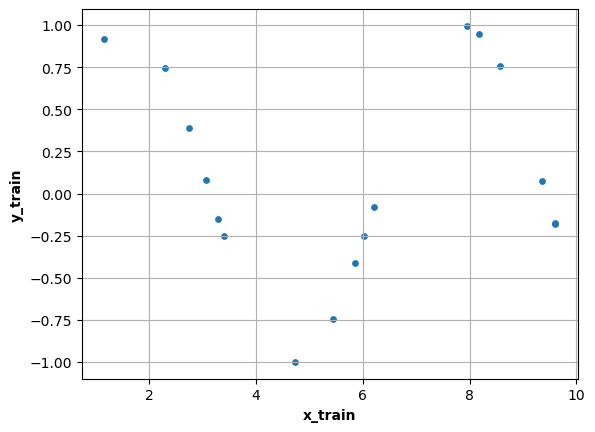

In [199]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,s=15)
plt.grid()
plt.xlabel('x_train',weight='bold')
plt.ylabel('y_train',weight='bold')
plt.show()

#### Training and vizualizing model f which uses the Lagrange interpolating polynomial:


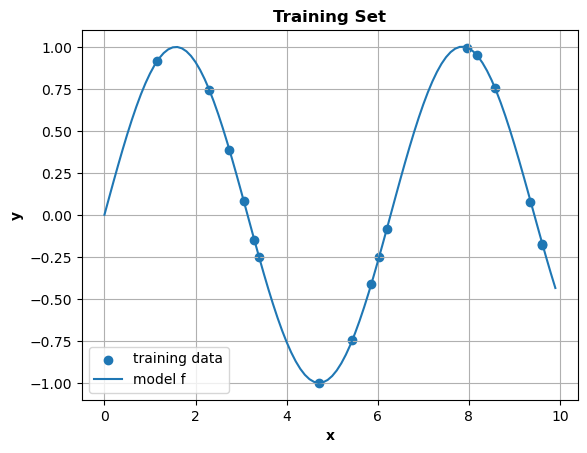

In [220]:
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

f = lagrange(x_train, y_train)

x_new = np.arange(0, 10, 0.1)
plt.ylim([-1.1,1.1])
plt.scatter(x_train, y_train, label='training data')
plt.plot(x_new, Polynomial(f.coef[::-1])(x_new), label='model f')
plt.legend()
plt.grid()
plt.xlabel('x',weight='bold')
plt.ylabel('y',weight='bold')
plt.title('Training Set',weight='bold')
plt.show()

#### Visualizing how the polynomial fits the test data -> it fits well!

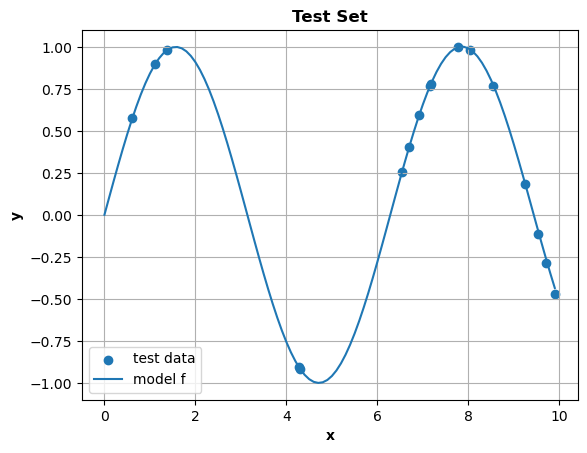

In [219]:
x_new = np.arange(0, 10, 0.1)
plt.ylim([-1.1,1.1])
plt.scatter(x_test, np.sin(x_test), label='test data')
plt.plot(x_new, Polynomial(f.coef[::-1])(x_new), label='model f')
plt.legend()
plt.grid()
plt.xlabel('x',weight='bold')
plt.ylabel('y',weight='bold')
plt.title('Test Set',weight='bold')
plt.show()

#### Next we look at the train and test MAE of the model f:

In [201]:
y_train_pred = Polynomial(f.coef[::-1])(x_train)
y_train_true = np.sin(x_train)
y_test_pred = Polynomial(f.coef[::-1])(x_test)
y_test_true = np.sin(x_test)
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train_true, y_train_pred)
mae_test = mean_absolute_error(y_test_true, y_test_pred)
print('\tMAE Train: %.6f'%mae_train)
print('\tMAE Test:  %.6f'%mae_test)

	MAE Train: 0.003127
	MAE Test:  0.004501


#### Adding zero-mean Gaussian noise ϵ to x with differeing standard deviations:

In [232]:
std_devs = [.1,.25,.5,.75,1]
train_maes = []
test_maes = []
for std_dev in std_devs:
    noise = np.random.normal(0,std_dev,17)
    x_train_new = x_train + noise
    f_new = lagrange(x_train_new, y_train)
    mae_train = mean_absolute_error(np.sin(x_train), Polynomial(f_new.coef[::-1])(x_train_new))
    train_maes.append(mae_train)
    mae_test = mean_absolute_error(np.sin(x_test), Polynomial(f_new.coef[::-1])(x_test))
    test_maes.append(mae_test)

In [246]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
results = pd.DataFrame([std_devs,train_maes,test_maes]).transpose()
results.columns = ['Std Dev','Train MAE','Test MAE']
results = results.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])]).format({'Std Dev':'{:,.2f}'.format})
results.set_properties(**{'text-align': 'center'}).hide_index()

Std Dev,Train MAE,Test MAE
0.10,0.000459,1167.052261
0.25,0.000600,186.777153
0.50,0.001594,1371.728962
0.75,0.010461,100613.924695
1.00,0.020692,125771.988444


#### The model generalizes very poorly because adding noise to the training x-values causes the Lagrange polynomial to act erratically as seen in the plot below. Here the noise has a std dev of 0.1 and a mean of 0.

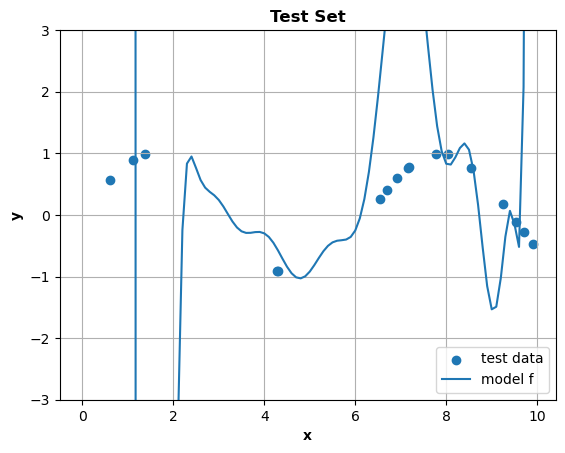

In [248]:
x_new = np.arange(0, 10, 0.1)
noise = np.random.normal(0,.1,17)
x_train_new = x_train + noise
f_new = lagrange(x_train_new, y_train)
plt.ylim([-3,3])
plt.scatter(x_test, np.sin(x_test), label='test data')
plt.plot(x_new, Polynomial(f_new.coef[::-1])(x_new), label='model f')
plt.legend()
plt.grid()
plt.xlabel('x',weight='bold')
plt.ylabel('y',weight='bold')
plt.title('Test Set',weight='bold')
plt.show()